# (2)バーガース方程式


## 初期条件

- No1.Godunov法 $u_1 = 1.0, u_2 = -1.0, dt=0.05, dx=0.1$
- No2.Godunov法 $u_1 = -1.0, u_2 = 1.0, dt=0.05, dx=0.1$

In [136]:
def init(u1: float, u2: float, dx: float):
    xmin = -1.5
    xmax = 1.5
    xnum = int((xmax - xmin) / dx + 1)
    nmax = 10
    x = np.linspace(xmin, xmax, xnum)
    u = np.zeros((nmax, xnum))
    u[0, x < 0] = u1
    u[0, x >= 0] = u2
    return x, u

def main(x: np.ndarray, u: np.ndarray, dt: float, dx: float, ff):
    for n in range(1, nmax):
        uold = u[n-1]
        _u = np.zeros_like(uold)
        for i in range(1, len(x) - 1):
            ff1 = ff(uold, uold[i], dt, dx, i)
            ff2 = ff(uold, uold[i], dt, dx, i-1)
            _u[i] = uold[i] - dt / dx * (ff1 - ff2)
        u[n] = _u
    return u

def godunov(u: np.ndarray, c: float, dt: float, dx: float, i: int):
    um = 0.5 * (u[i] + np.abs(u[i]))
    up = 0.5 * (u[i+1] - np.abs(u[i+1]))
    return np.max([0.5 * um ** 2, 0.5 * up ** 2])

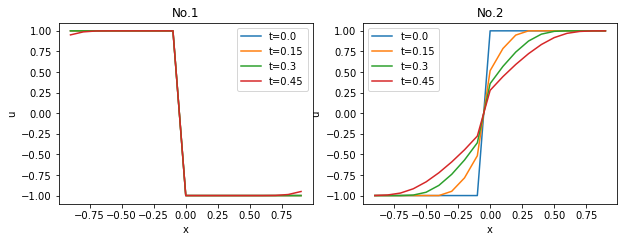

In [137]:
def solve(u1, u2, dt, dx):
    x, u = init(u1=u1, u2=u2, dx=dx)
    u = main(x=x, u=u, dt=dt, dx=dx, ff=godunov)
    return x, u, dt

x1, result1, dt1 = solve(u1=1.0, u2=-1.0, dt=0.05, dx=0.1)
x2, result2, dt2 = solve(u1=-1.0, u2=1.0, dt=0.05, dx=0.1)
# x3, result3, dt3 = Lax(u1=0.0, u2=1.0, dt=0.05, dx=0.1)
# x4, result4, dt4 = Lax(u1=0.0, u2=1.0, dt=0.3, dx=0.1)

plt.rcParams["figure.subplot.hspace"] = 0.40
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
# ax3 = fig.add_subplot(2, 2, 3)
# ax4 = fig.add_subplot(2, 2, 4)

dts = [dt1, dt2, dt3, dt4]
xs = [x1, x2, x3, x4]
axs = [ax1, ax2, ax3, ax4]
us = [result1, result2, result3, result4]

for n in range(nmax):
    if n % 3 == 0:
        for index, ax in enumerate(axs):
            dt = dts[index]
            u = us[index]
            _x = xs[index]
            x = _x[(_x > -1.0) & (_x < 1.0)]
            ax.plot(x, u[n, (_x > -1.0) & (_x < 1.0)], label="t={0}".format(np.round(n*dt, decimals=6)))
            ax.set_xlabel("x")
            ax.set_ylabel("u")
            ax.set_title("No.{0}".format(index+1))
            ax.legend()